#Notes on Filtering and Square-law detector

This notebook has a few examples and generates some graphs used in the thesis in Chapter 4

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy
import numpy as np
import scipy.io as sio
import matplotlib.image as mpimg
from scipy import signal
import savitzky_golay

##Square-law detector
A square-law detector can look at a noisy signal with a mean value of zero, and read the peak values to get a total power of that signal.  Here we will generate a noisy signal and then look at the peak values.

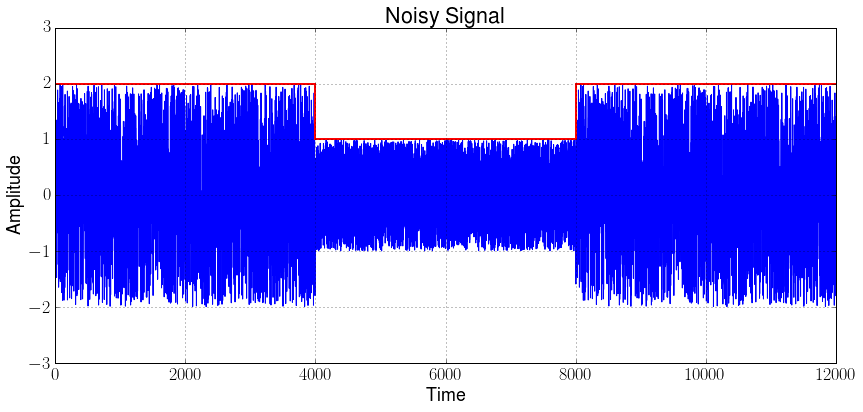

In [3]:
#Generate a noisy signal
NOISE_AMPLITUDE = 4.0
PERIOD = 200
PRESENCE_PROBABILITY = .4
# size of sample
S_O_S = 4000

signal = np.where(np.arange(4000) % PERIOD > PERIOD / 2, 0.5, -0.5)
noise = np.random.uniform(
    low=-0.5*NOISE_AMPLITUDE, 
    high=0.5*NOISE_AMPLITUDE, 
    size=S_O_S
)
noise = np.where(
    np.random.uniform(size=len(noise)) < PRESENCE_PROBABILITY, 
    signal, noise
)

noise1 = np.random.uniform(
    low=-0.25*NOISE_AMPLITUDE, 
    high=0.25*NOISE_AMPLITUDE, 
    size=S_O_S
)

#noisy = noise;
noisy1 = np.append(noise,noise1);
noisy = np.append(noisy1,noise);
#noisy.append(noise);

matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})


fig = plt.figure(figsize=(14,6), dpi=300)
plt.plot( noisy,'b-', label="signal mixed in random noise")
plt.plot([0, 4000], [2, 2], color='red', linestyle='-', linewidth=2)
plt.plot([4000, 4000], [2, 1], color='red', linestyle='-', linewidth=2)
plt.plot([4000, 8000], [1, 1], color='red', linestyle='-', linewidth=2)
plt.plot([8000, 8000], [1, 2], color='red', linestyle='-', linewidth=2)
plt.plot([8000, 12000], [2, 2], color='red', linestyle='-', linewidth=2)

xlabel('Time')
ylabel('Amplitude')
title('Noisy Signal')
axis([0, 12000, -3, 3])
grid(True)

fig.savefig("noisy_sig.pdf", dpi=300)
fig.savefig("noisy_sig.png", dpi=300)

Now we will find the peak values

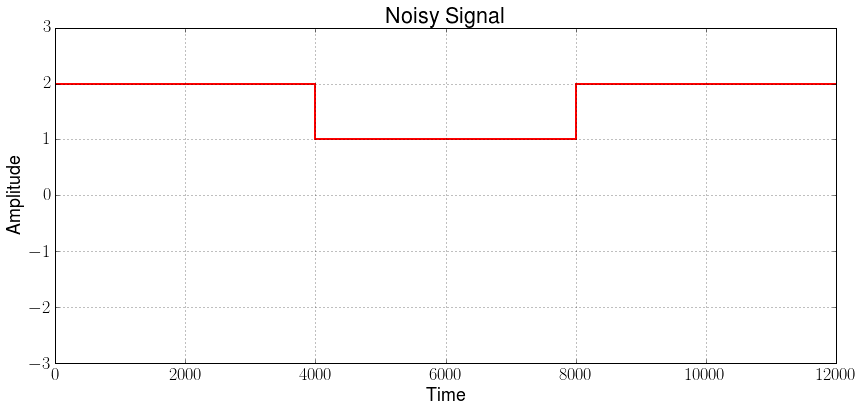

In [5]:
fig = plt.figure(figsize=(14,6), dpi=300)
#plt.plot( noisy,'b-', label="signal mixed in random noise")
plt.plot([0, 4000], [2, 2], color='red', linestyle='-', linewidth=2)
plt.plot([4000, 4000], [2, 1], color='red', linestyle='-', linewidth=2)
plt.plot([4000, 8000], [1, 1], color='red', linestyle='-', linewidth=2)
plt.plot([8000, 8000], [1, 2], color='red', linestyle='-', linewidth=2)
plt.plot([8000, 12000], [2, 2], color='red', linestyle='-', linewidth=2)

xlabel('Time')
ylabel('Amplitude')
title('Noisy Signal')
axis([0, 12000, -3, 3])
grid(True)

fig.savefig("TPR.pdf", dpi=300)
fig.savefig("TPR.png", dpi=300)